In [ ]:
!pip install opencv-python

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566171 sha256=9b4595e8207e21f0cbccc7d1afba3f85da821461099b3370ed5dafd371335986
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


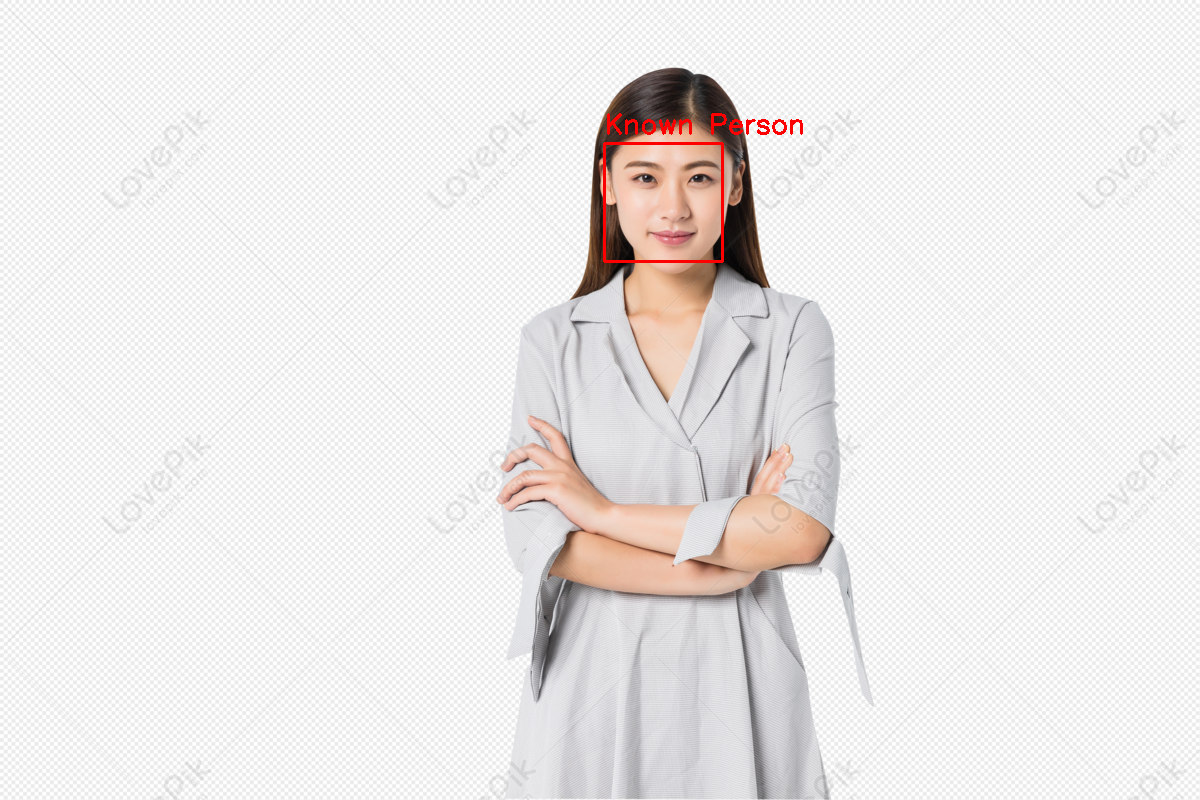

In [ ]:
import cv2
import dlib
import face_recognition
from google.colab.patches import cv2_imshow

# Load images and encode known faces
known_faces = []

# Load a sample image of a known person and encode their face
known_image = face_recognition.load_image_file('women.png')
known_encoding = face_recognition.face_encodings(known_image)[0]
known_faces.append(known_encoding)

# Read an input image
image_path = 'women.png'
image = cv2.imread(image_path)

# Check if image was successfully loaded
if image is None:
    raise ValueError(f"Failed to load image: {image_path}")

# Convert the image to RGB
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detect faces in the image using the CNN model (set model='cnn')
face_locations = face_recognition.face_locations(rgb_image, model='cnn')
face_encodings = face_recognition.face_encodings(rgb_image, face_locations)

# Iterate over detected faces and compare with known faces
for face_encoding, face_location in zip(face_encodings, face_locations):
    top, right, bottom, left = face_location

    # Compare the face encoding with known faces
    matches = face_recognition.compare_faces(known_faces, face_encoding)
    name = "Unknown"

    # Find the best match
    if True in matches:
        first_match_index = matches.index(True)
        name = "Known Person"
    else:
      print("unknown person")

    # Draw a box around the face
    cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)

    # Draw the name of the person
    cv2.putText(image, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

# Display the resulting image
cv2_imshow(image)
